In [36]:
import numpy as np

In [37]:
def compute_length(vector):
    sum_squares  = np.sum([x ** 2 for x in vector])
    return np.sqrt(sum_squares )

def compute_dot_product(vector1, vector2):
    return np.sum([u * v for u, v in zip(vector1, vector2)])

def matrix_multi_vector(matrix: np.ndarray, vector: np.ndarray):

    rows, _ = matrix.shape
    result = np.zeros(rows)
    for i in range(rows):
        result[i] = compute_dot_product(matrix[i], vector)
    return result

def matrix_multi_matrix(matrix1:np.ndarray, matrix2:np.ndarray):
    
    row1, col1 = matrix1.shape
    row2, col2 = matrix2.shape

    if col1 != row2:
        raise ValueError("Matrix dimensions are not compatible for multiplication")
    
    result = np.zeros((row1, col2))
    for i in range(col2):
        result[:, i] = matrix_multi_vector(matrix1, matrix2[:, i])
    
    return result

def inverse_matrix(A: np.ndarray):

    detA = np.linalg.det(A)
    if detA == 0:
        raise ValueError("Matrix input is not invertible")
    
    return np.linalg.inv(A)


def compute_eigenvalues_eigenvectors(matrix: np.ndarray):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    eigenvectors = eigenvectors 

    return eigenvalues, eigenvectors

def compute_cosine(v1, v2):

    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))   

In [38]:
compute_eigenvalues_eigenvectors(
    np.array(
      [[0, 1], [1, 0]]
    )
)

(array([ 1., -1.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [60]:
import math


def calculate_eigenvalues_eigenvectors(A):
    def get_eigenvalues(matrix):
        a, b, c, d =  matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]
        trace = a + d
        determinant = a * d - b * c

        discriminant = trace**2 - 4 * determinant
        if discriminant < 0:
            raise ValueError("Complex eigenvalues are not supported in this implementation.")
        
        sqrt_discriminant = math.sqrt(discriminant)
        eigenvalue1 = (trace + sqrt_discriminant) / 2
        eigenvalue2 = (trace - sqrt_discriminant) / 2


        return eigenvalue1, eigenvalue2

    def get_eigenvectors(matrix, eigenvalue):
        a, b, c, d = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]
        A = a - eigenvalue
        B = b
        C = c
        D = d - eigenvalue

        

        if B != 0:
            x1 = 1
            x2 = -A / B
        elif C != 0:
            x1 = -D / C
            x2 = 1
        else:
            return []

        norm = (x1**2 + x2**2) ** 0.5
        x1 /= norm
        x2 /= norm
        
        return x1, x2


        

    eigenvalue1, eigenvalue2 = get_eigenvalues(A)
    
    eigenvector1 = get_eigenvectors(A, eigenvalue1)
    eigenvector2 = get_eigenvectors(A, eigenvalue2)

    return {eigenvalue1: eigenvector1, eigenvalue2: eigenvector2}



In [61]:
calculate_eigenvalues_eigenvectors([[1,4], [3,2]])

{5.0: (0.7071067811865475, 0.7071067811865475), -2.0: (0.8, -0.6)}

## 4. Background Subtraction

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [42]:
bg1 = cv2.imread("./img_exercise/GreenBackground.png")
bg1 = cv2.resize(bg1, (678, 381))

obj = cv2.imread('./img_exercise/Object.png')
obj = cv2.resize(obj, (678, 381))

bg2 = cv2.imread("./img_exercise/NewBackground.jpg")
bg2 = cv2.resize(bg2, (678, 381))

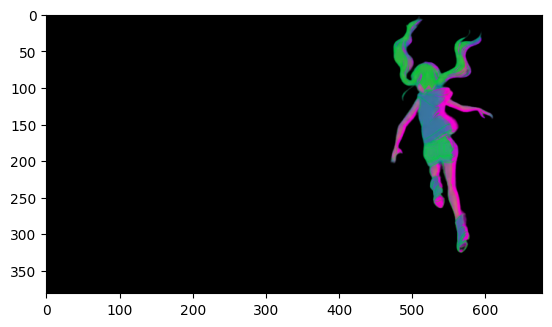

In [43]:
def compute_difference(bg, input):
    return cv2.absdiff(input, bg)

difference_single_channel = compute_difference(
    bg1, obj
)
plt.imshow(difference_single_channel[:, :, ::-1])

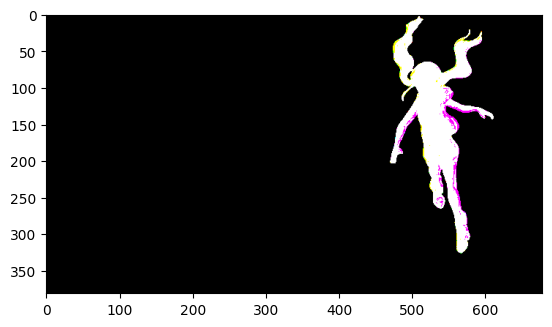

In [44]:
def compute_binary_mask(difference_single_channel):
    return cv2.threshold(
        difference_single_channel,
        4,
        255,
        cv2.THRESH_BINARY
    )[1]
binary_mask = compute_binary_mask ( difference_single_channel )
plt.imshow(binary_mask)

In [45]:
def replace_background_difference(bg1, bg2, obj_img):
    difference_single_channel = compute_difference(
        bg1,
        obj_img 
    )
    binary_mask = compute_binary_mask(difference_single_channel)

    output = np.where(binary_mask == 0, bg2, obj_img)
    return output

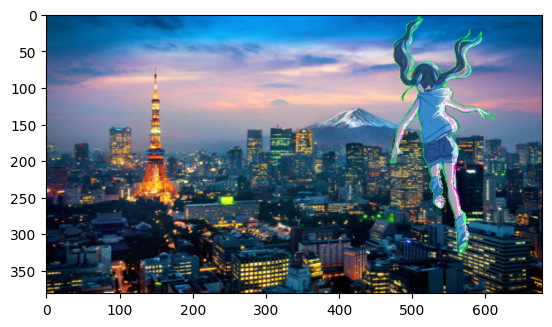

In [46]:
res = replace_background_difference(bg1, bg2, obj)
plt.imshow(res[:, :, ::-1])

In [47]:
vector = np. array ([ -2 , 4 , 9 , 21])
result = compute_length ([ vector ])
print ( round (result ,2) )

23.28


In [48]:
v1 = np. array ([0 , 1 , -1 , 2])
v2 = np. array ([2 , 5 , 1 , 0])
result = compute_dot_product (v1 , v2)
print ( round (result ,2) )

4


In [49]:
x = np. array ([[1 , 2] ,
[3 , 4]])
k = np. array ([1 , 2])
print('result \n', x.dot(k))

result 
 [ 5 11]


In [50]:
x = np. array ([[ -1 , 2] ,
[3 , -4]])
k = np. array ([1 , 2])

print ('result \n', x@k ), x.shape, k.shape

result 
 [ 3 -5]


(None, (2, 2), (2,))

In [51]:
m = np. array ([[ -1 , 1 , 1] , [0 , -4 , 9]])
v = np. array ([0 , 2 , 1])
result = matrix_multi_vector (m, v)
print ( result )

[3. 1.]


In [52]:
m1 = np. array ([[0 , 1 , 2] , [2 , -3 , 1]])
m2 = np. array ([[1 , -3] ,[6 , 1] , [0 , -1]])
result = matrix_multi_matrix (m1 , m2)
print ( result )

[[  6.  -1.]
 [-16. -10.]]


In [53]:
m1 = np.eye (3)
m2 = np. array ([[1 , 1 , 1] ,[2 , 2 , 2] , [3 , 3 , 3]])
result = m1@m2
print ( result )

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [54]:
m1 = np.eye (2)
print(m1)
m1 = np. reshape (m1 ,( -1 ,4) ) [0]
print(m1.shape)
print(m2.shape)
m2 = np. array ([[1 , 1 , 1 , 1] ,[2 , 2 , 2 , 2] , [3 , 3 , 3 , 3] , [4 , 4 , 4 , 4]])
result = m1@m2
print ( result )

[[1. 0.]
 [0. 1.]]
(4,)
(3, 3)
[5. 5. 5. 5.]


In [55]:
m1 = np. array ([[1 , 2] , [3 , 4]])
print(m1)
m1 = np. reshape (m1 ,( -1 ,4), 'F') [0]
print(m1)
print(m1.shape)
print(m2.shape)
m2 = np. array ([[1 , 1 , 1 , 1] ,[2 , 2 , 2 , 2] , [3 , 3 , 3 , 3] , [4 , 4 , 4 , 4]])
result = m1@m2
print ( result )

[[1 2]
 [3 4]]
[1 3 2 4]
(4,)
(4, 4)
[29 29 29 29]


In [56]:
m1 = np. array ([[ -2 , 6] , [8 , -4]])
result = inverse_matrix (m1)
print ( result )

[[0.1  0.15]
 [0.2  0.05]]


In [57]:
matrix = np. array ([[0.9 , 0.2] , [0.1 , 0.8]])
eigenvalues , eigenvectors = compute_eigenvalues_eigenvectors ( matrix )
print ( eigenvectors )

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [58]:
x = np. array ([1 , 2 , 3 , 4])
y = np. array ([1 , 0 , 3 , 0])
result = compute_cosine (x,y)
print ( round (result , 3) )

0.577
